In [138]:
import matplotlib.pyplot as plt
import matplotlib
import uproot as ur
from analysis_with_sim import analysis
import numpy as np
import pandas as pd

In [2]:
a = analysis()

In [6]:
data = a.get_MC_data()[0]

In [157]:
for key in data.keys():
    data[key] = data[key].loc[(data[key]['truth_energy']>0) & (data[key]['truth_energy'].duplicated() == False)]
    data[key].index = [i for i in range(0,len(data[key]))]

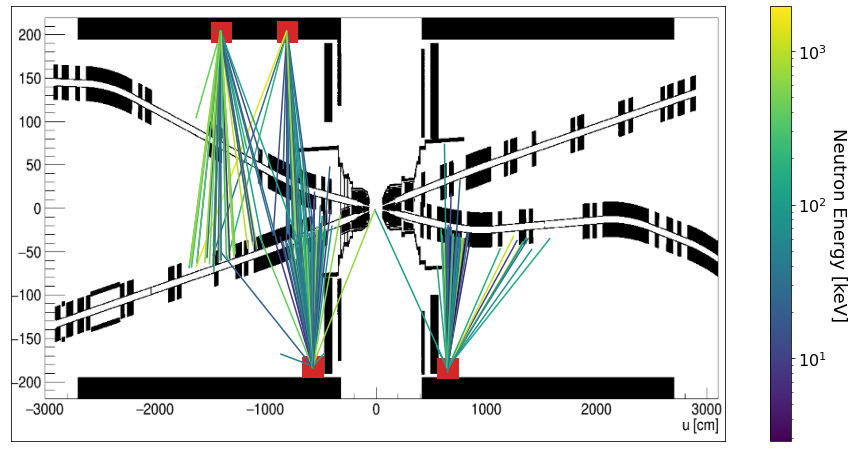

In [167]:
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

cm = matplotlib.cm.viridis
norm = matplotlib.colors.LogNorm()
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)


img = plt.imread("/home/jeef/Pictures/farbeamline.png")
fig, ax = plt.subplots(figsize = (16,8))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(np.flipud(img), origin = 'lower', extent = [-3300,3170, -267,233], aspect = 'auto')

###Make Consistent Color Scale###
df = pd.DataFrame()
for key in data.keys():
    df = df.append(data[key])
df.index = [i for i in range(0,len(df))]
color = cm(norm(df['truth_energy']))
###

j=0
for key in data.keys():
    ax.plot(data[key]['truth_vertex_Z'].mean(), data[key]['truth_vertex_X'].mean(), 's', color = 'tab:red', markersize = 20)
    for i in range(0,len(data[key])):
        zs = [data[key]['truth_mother_Z'].iloc[i], data[key]['truth_vertex_Z'].iloc[i]]
        xs = [data[key]['truth_mother_X'].iloc[i], data[key]['truth_vertex_X'].iloc[i]]
        ax.plot(zs, xs, color = color[j])
        j+=1
plt.colorbar(sm).set_label('Neutron Energy [keV]', rotation = 270, labelpad = 20)
plt.show()

In [165]:
for key in data.keys():
    print(len(data[key]))

5
1
75
1
1
97
1
1
2
23
1
4
41


In [166]:
len(df)

253